# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import imghdr

In [2]:
import os

<module 'imghdr' from 'C:\\Users\\rijan\\anaconda3\\envs\\envtf\\lib\\imghdr.py'>


# Remove unsupported images

In [71]:
image_exts = ['jpeg','jpg','bmp','png']

In [75]:
data_dir_train = 'dataset/Train'

In [81]:
def unnecessary_img_remove(data_dir):  
  for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
      image_path = os.path.join(data_dir, image_class, image)
      try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
          print(f'Image not in ext list{image_path}')
          os.remove(image_path)
      except Exception as e:
        print(f'Issue with image{image_path}')

In [82]:
unnecessary_img_remove(data_dir_train)

# Loading data


In [9]:
from matplotlib import pyplot as plt

In [10]:
import os

dir_path = 'dataset/Train'
classes = os.listdir(dir_path)

for cl in classes:
    cl_path = os.path.join(dir_path, cl)
    print("Class: ", cl)
    print("Number of Images: ", len(os.listdir(cl_path)))


Class:  fruit
Number of Images:  576
Class:  motorbike
Number of Images:  576


In [11]:
data_train = tf.keras.utils.image_dataset_from_directory(dir_path)

Found 1152 files belonging to 2 classes.


In [12]:
# tf.keras.utils.image_dataset_from_directory?

In [13]:
data_train_iterator = data_train.as_numpy_iterator()

In [14]:
batch_train = data_train_iterator.next()

In [15]:
batch_train[1]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [16]:
def plot_the_data(batch,mm,nn):

  fig, ax = plt.subplots(nrows=8,ncols=4,figsize=(20,20))
  plt.subplots_adjust(hspace=0.5)
  for idx, img in enumerate (batch[0][mm:nn]):
    row = idx // 4
    col = idx % 4
    ax[row,col].imshow(img.astype(int))
    ax[row,col].title.set_text(batch[1][idx])

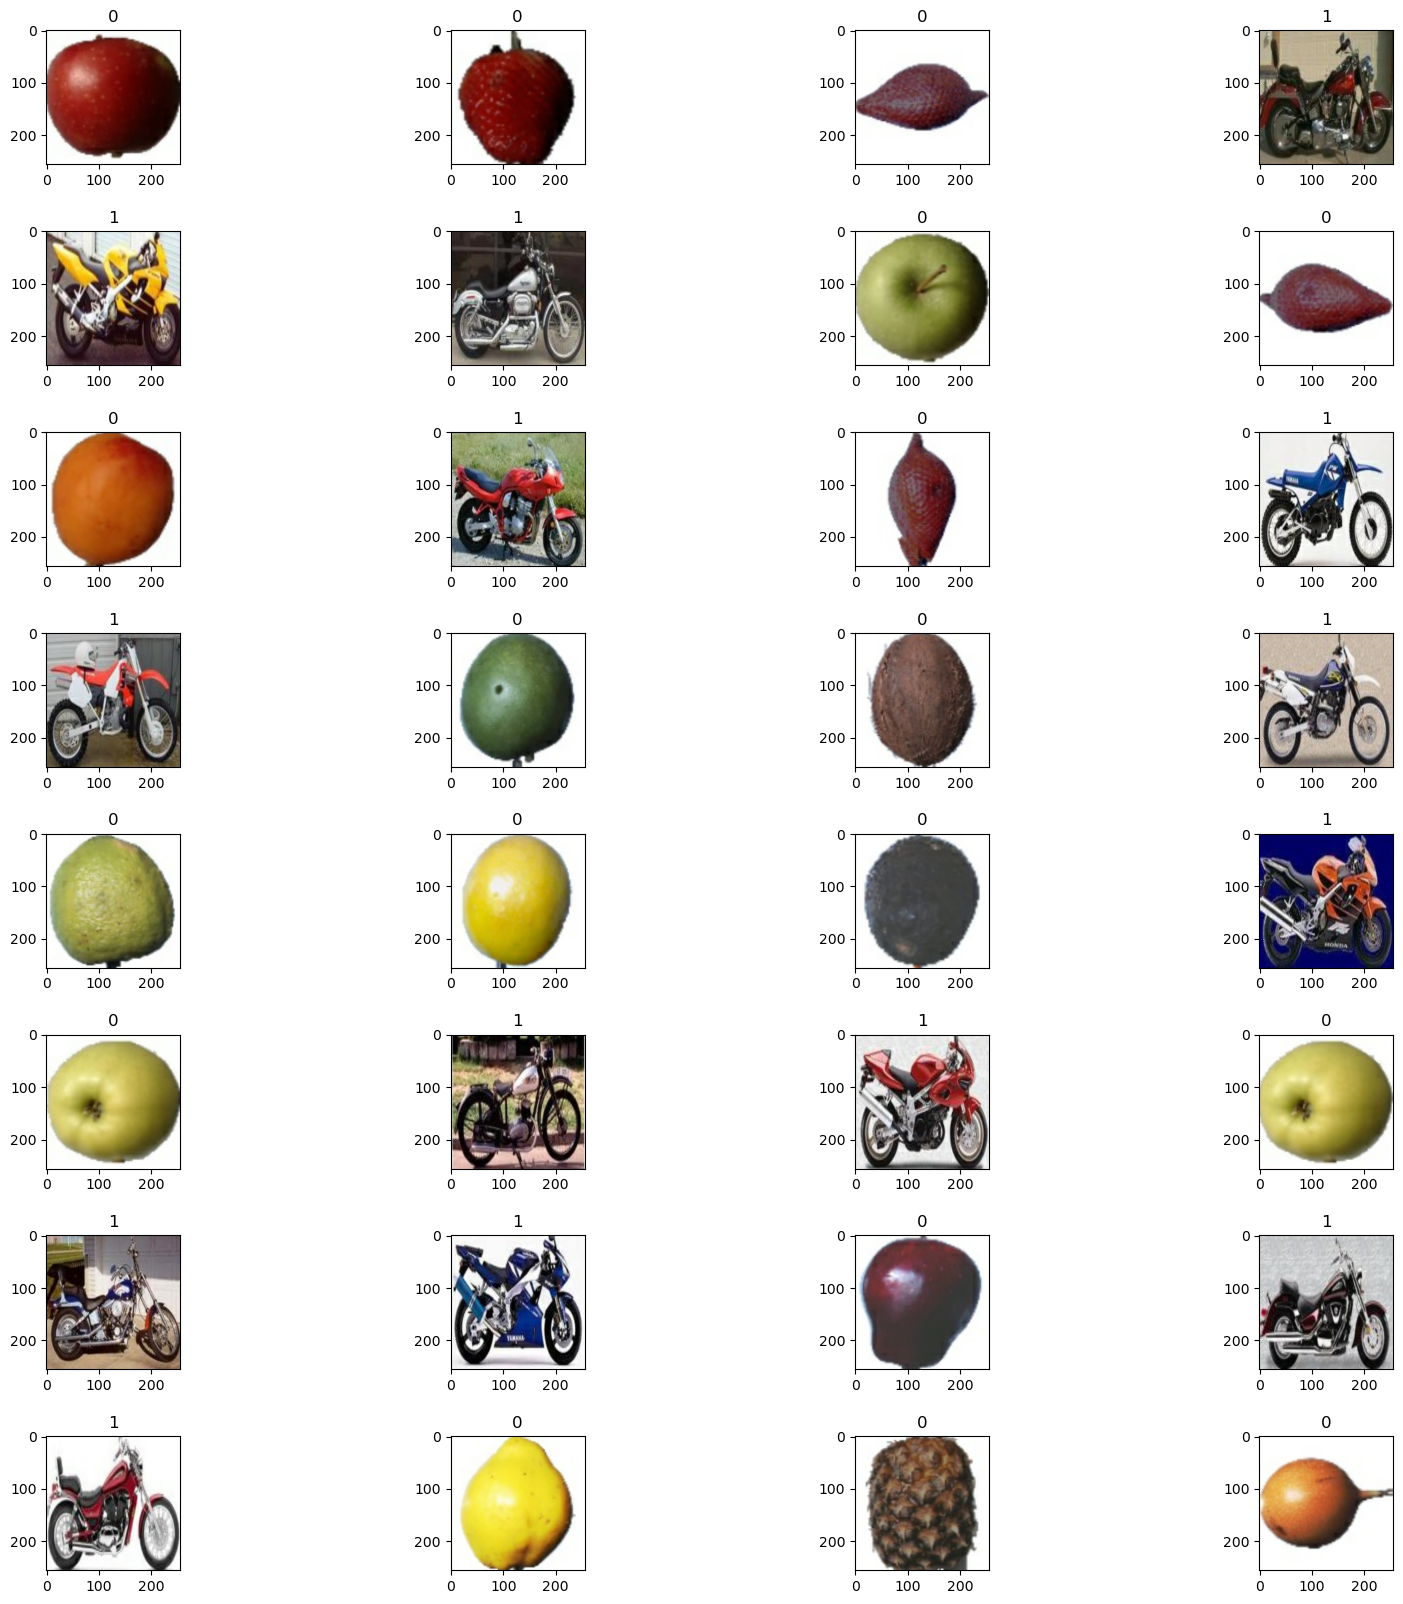

In [17]:
plot_the_data(batch_train,0,32)

# Scale data

In [18]:
def dataScale(data):
  data = data.map(lambda x,y:(x/255,y))
  To_numpy_iterator = data.as_numpy_iterator().next()
  print(To_numpy_iterator[0].max())
  print(To_numpy_iterator[0].min())

In [19]:
dataScale(data_train)

1.0
0.0


# Train and test data

In [20]:
len(data_train)

36

In [21]:
train_size = int(len(data_train)*.7)
val_size = int(len(data_train)*.2)+1
test_size = int(len(data_train)*.1)+1

In [22]:
train_size

25

In [23]:
val_size

8

In [24]:
test_size

4

In [25]:
train = data_train.take(train_size)
val = data_train.skip(train_size).take(val_size)
test = data_train.skip(train_size+val_size).take(test_size)

In [26]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Building deep learning model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import tensorflow as tf

In [28]:
tf.random.set_seed(1234)
model = Sequential(name='Image_Classifier')

In [29]:
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten(name='flatten'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [31]:
model.summary()

Model: "Image_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)  

# Train

In [32]:
logdir = 'logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [34]:
 hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
25/25 [==============================] - 10s 177ms/step - loss: 32.6928 - accuracy: 0.8000 - val_loss: 0.2134 - val_accuracy: 0.9570
Epoch 2/10
25/25 [==============================] - 4s 174ms/step - loss: 0.0676 - accuracy: 0.9800 - val_loss: 0.0331 - val_accuracy: 0.9961
Epoch 3/10
25/25 [==============================] - 4s 177ms/step - loss: 0.0309 - accuracy: 0.9950 - val_loss: 0.0285 - val_accuracy: 0.9922
Epoch 4/10
25/25 [==============================] - 4s 167ms/step - loss: 0.0150 - accuracy: 0.9975 - val_loss: 0.0548 - val_accuracy: 0.9961
Epoch 5/10
25/25 [==============================] - 4s 170ms/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 0.0823 - val_accuracy: 0.9922
Epoch 6/10
25/25 [==============================] - 4s 172ms/step - loss: 0.0049 - accuracy: 0.9975 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 4s 172ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 5.1813e-05 - val_accuracy: 1.0000


  # plot
  

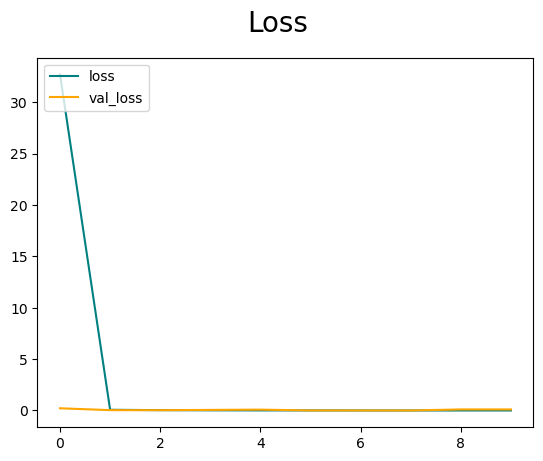

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


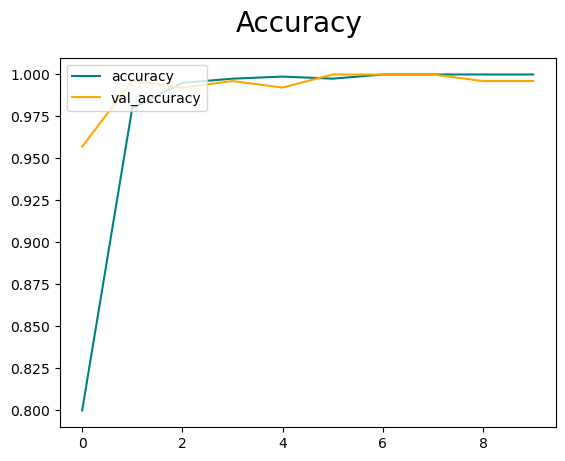

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluating 

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
#     yhat = np.argmax(model.predict(X),axis = 1)
    yhat = model.predict(X)
    acc.update_state(y,yhat)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    
# print(f"{y} \n {yhat}")


1/1 [==============================] - 0s 47ms/step


In [40]:
 print(f'prediction:{pre.result().numpy()}, result: {re.result().numpy()}, accuracy:{ acc.result().numpy()}')

prediction:1.0, result: 1.0, accuracy:1.0


# predict

In [41]:
def color_adjust(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

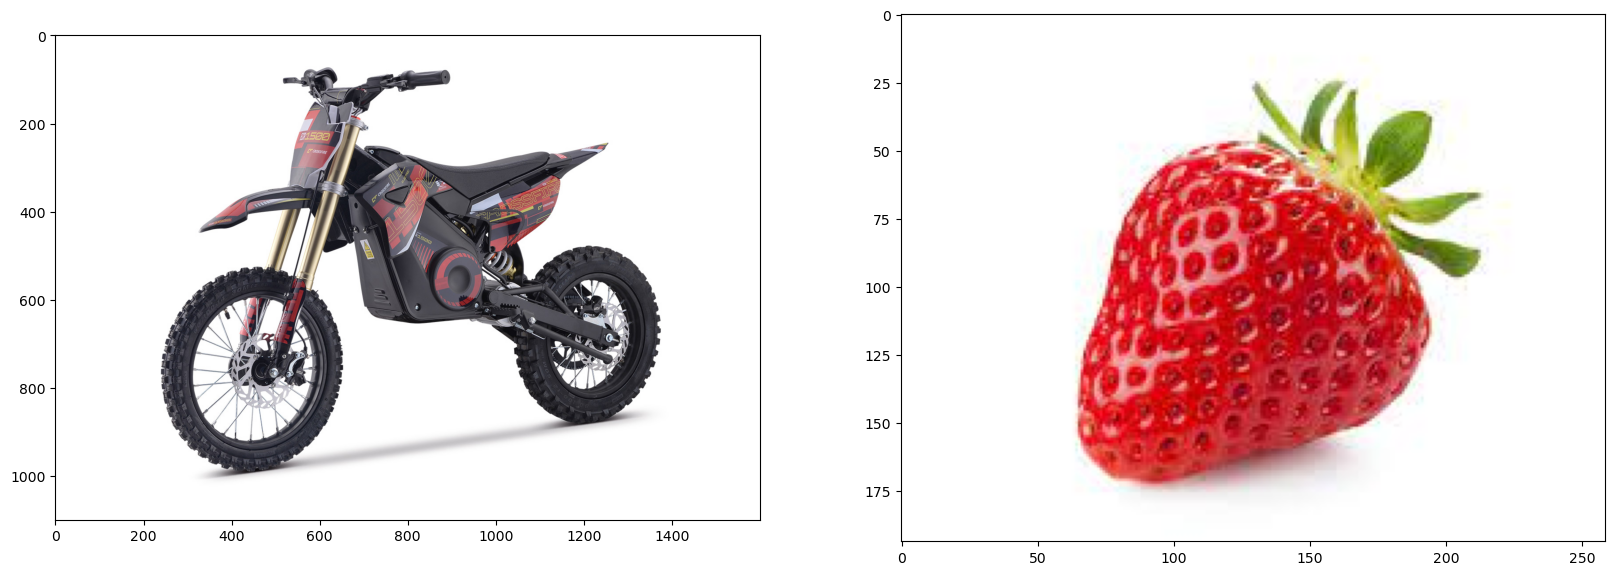

In [42]:
img0 = color_adjust(cv2.imread("NeverSeenData/Motorbike.jpg"))
img1 = color_adjust(cv2.imread("NeverSeenData/strawberry.jpg"))
img = [img0,img1]
fig, ax = plt.subplots(ncols=2, figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
for idx,image in enumerate (img):
    ax[idx].imshow(image)

In [43]:
resize0 = tf.image.resize(img0, (256,256))
resize1 = tf.image.resize(img1, (256,256))

resize = [resize0,resize1]

1/1 [==============================] - 0s 356ms/step
[[0.50579774]]
1/1 [==============================] - 0s 20ms/step
[[0.48831448]]


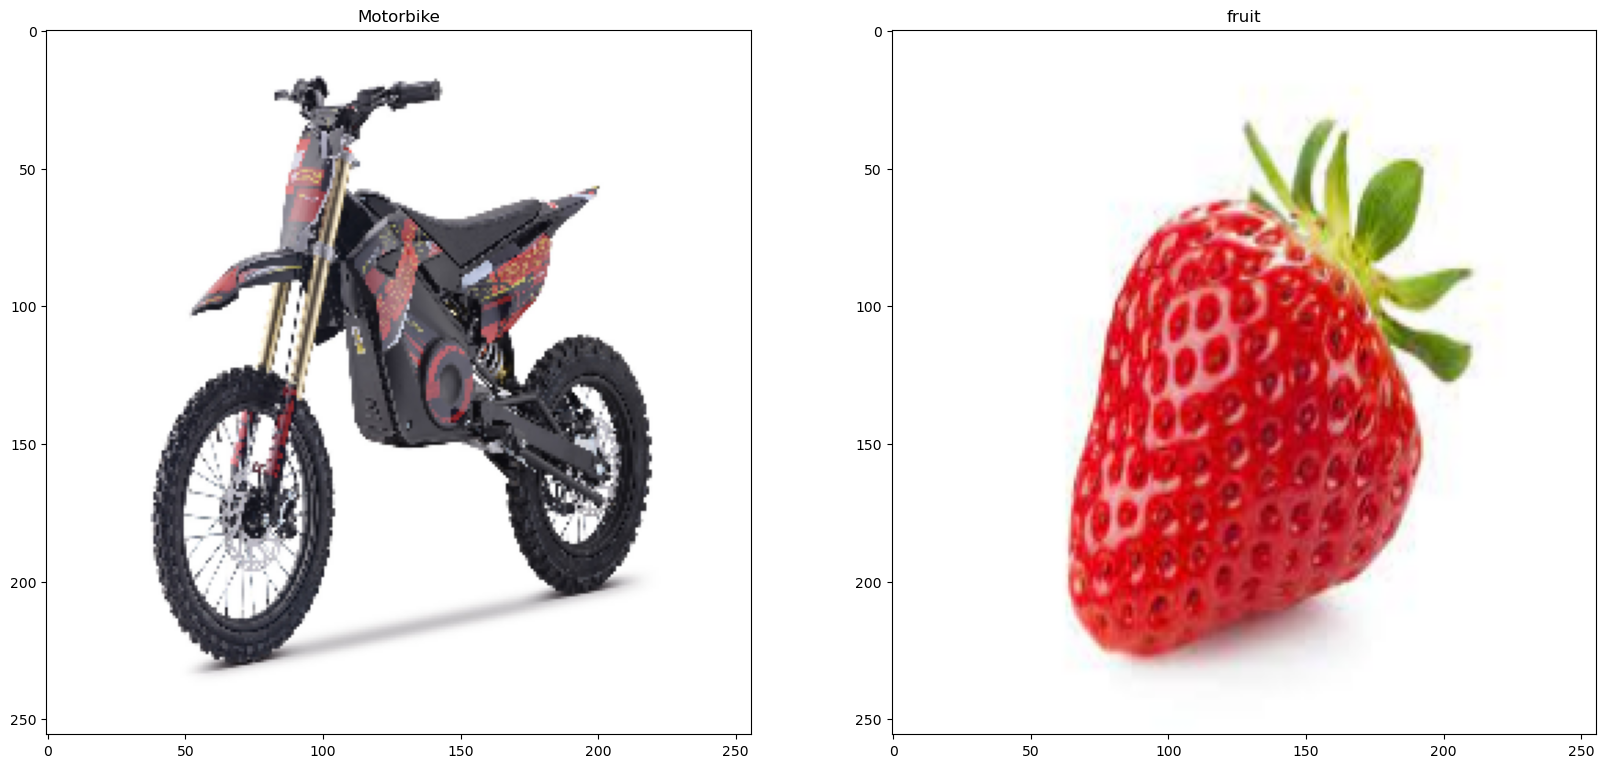

In [44]:
fig, ax = plt.subplots(ncols=2, figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
for idx,img in enumerate (resize):
    yhat = model.predict(np.expand_dims(img/255, 0))
    img = img.numpy().astype(int)
    ax[idx].imshow(img)
    print (yhat)
    if yhat < 0.5:
        label_predict = 'fruit'
    if yhat > 0.5: 
        label_predict = 'Motorbike'    
    ax[idx].title.set_text(label_predict)

# Save

In [61]:
model.save(os.path.join('models','Binaryclassifier fruits and motorbike.h5'))

In [62]:
from tensorflow import keras
model_old = keras.models.load_model('models/Binaryclassifier fruits and motorbike.h5')

1/1 [==============================] - 0s 37ms/step
[[0.50579774]]


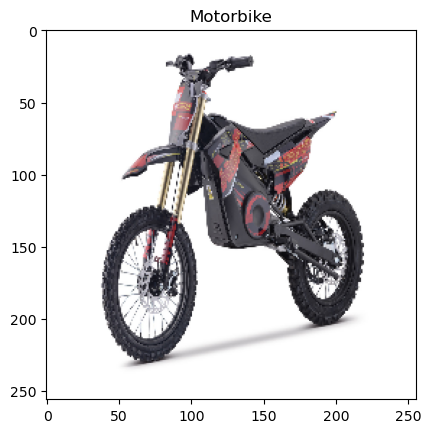

In [65]:
yhat2 = model_old.predict(np.expand_dims(resize0/255, 0))
print(yhat2)
plt.imshow(resize0.numpy().astype(int))
if yhat2 < 0.5:
    label_predict = 'fruit'
if yhat2 > 0.5: 
    label_predict = 'Motorbike'
plt.title(label_predict)
plt.show()